# Imports

In [2]:
import pandas as pd
import os
import numpy as np
import copy
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

C:\Users\romanrosh\anaconda3\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.8f}'.format)

# Reading the data

In [8]:
df = pd.read_csv('combined_all.csv')

In [9]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,day
0,80,38308,1,1,6,6,6,6,6.00000000,0.00000000,6,6,6.00000000,0.00000000,313.25049600,52.20841600,38308.00000000,0.00000000,38308,38308,0,0.00000000,0.00000000,0,0,0,0.00000000,0.00000000,0,0,0,0,0,0,20,20,26.10420800,26.10420800,6,6,6.00000000,0.00000000,0.00000000,0,0,0,0,1,1,0,0,1,9.00000000,6.00000000,6.00000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN,0
1,389,479,11,5,172,326,79,0,15.63636364,31.44923760,163,0,65.20000000,89.27877687,1039665.97100000,33402.92276000,31.93333333,25.51040871,73,0,479,47.90000000,38.94283560,109,1,401,100.25000000,101.73617840,237,3,0,0,0,0,368,176,22964.50939000,10438.41336000,0,163,29.29411765,56.52959922,3195.59558800,0,0,0,1,0,0,0,0,0,31.12500000,15.63636364,65.20000000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN,0
2,88,1095,10,6,3150,3150,1575,0,315.00000000,632.56163510,1575,0,525.00000000,813.32650270,5753424.65800000,14611.87215000,73.00000000,204.96097190,810,1,1095,121.66666670,298.74612970,915,1,995,199.00000000,345.53509230,810,3,0,0,0,0,336,208,9132.42009100,5479.45205500,0,1575,370.58823530,671.75154060,451250.13240000,0,0,0,1,0,0,0,0,0,393.75000000,315.00000000,525.00000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN,0
3,389,15206,17,12,3452,6660,1313,0,203.05882350,425.77847390,3069,0,555.00000000,977.48034160,665000.65760000,1907.14191800,543.07142860,2519.93137700,13391,0,15206,950.37500000,3322.41781200,13391,2,15112,1373.81818200,4176.44958800,13961,3,0,0,0,0,560,388,1117.97974500,789.16217280,0,3069,337.06666670,704.65408160,496537.37470000,0,0,0,1,0,0,0,0,0,348.68965520,203.05882350,555.00000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN,0
4,88,1092,9,6,3150,3152,1575,0,350.00000000,694.50971920,1576,0,525.33333330,813.84290050,5771062.27100000,13736.26374000,78.00000000,207.00092900,794,1,1092,136.50000000,313.85073800,910,1,1015,203.00000000,333.24015360,794,3,0,0,0,0,304,208,8241.75824200,5494.50549500,0,1576,393.87500000,704.58506700,496440.11670000,0,0,0,1,0,0,0,0,0,420.13333330,350.00000000,525.33333330,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN,0


In [12]:
# Will change column names by removing spaces and using lower characters
df.columns = df.columns.str.replace(' ', '').str.lower()

In [16]:
df.label.value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: label, dtype: int64

In [18]:
df.label.value_counts(normalize=True)

BENIGN                       0.80300366
DoS Hulk                     0.08162981
PortScan                     0.05614427
DDoS                         0.04522735
DoS GoldenEye                0.00363615
FTP-Patator                  0.00280421
SSH-Patator                  0.00208320
DoS slowloris                0.00204752
DoS Slowhttptest             0.00194260
Bot                          0.00069452
Web Attack � Brute Force     0.00053237
Web Attack � XSS             0.00023033
Infiltration                 0.00001272
Web Attack � Sql Injection   0.00000742
Heartbleed                   0.00000389
Name: label, dtype: float64

In [24]:
df.head()

,destinationport,flowduration,totalfwdpackets,totalbackwardpackets,totallengthoffwdpackets,totallengthofbwdpackets,fwdpacketlengthmax,fwdpacketlengthmin,fwdpacketlengthmean,fwdpacketlengthstd,bwdpacketlengthmax,bwdpacketlengthmin,bwdpacketlengthmean,bwdpacketlengthstd,flowbytes/s,flowpackets/s,flowiatmean,flowiatstd,flowiatmax,flowiatmin,fwdiattotal,fwdiatmean,fwdiatstd,fwdiatmax,fwdiatmin,bwdiattotal,bwdiatmean,bwdiatstd,bwdiatmax,bwdiatmin,fwdpshflags,bwdpshflags,fwdurgflags,bwdurgflags,fwdheaderlength,bwdheaderlength,fwdpackets/s,bwdpackets/s,minpacketlength,maxpacketlength,packetlengthmean,packetlengthstd,packetlengthvariance,finflagcount,synflagcount,rstflagcount,pshflagcount,ackflagcount,urgflagcount,cweflagcount,eceflagcount,down/upratio,averagepacketsize,avgfwdsegmentsize,avgbwdsegmentsize,fwdheaderlength.1,fwdavgbytes/bulk,fwdavgpackets/bulk,fwdavgbulkrate,bwdavgbytes/bulk,bwdavgpackets/bulk,bwdavgbulkrate,subflowfwdpackets,subflowfwdbytes,subflowbwdpackets,subflowbwdbytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,activemean,activestd,activemax,activemin,idlemean,idlestd,idlemax,idlemin,label,day
0,80,38308,1,1,6,6,6,6,6.00000000,0.00000000,6,6,6.00000000,0.00000000,313.25049600,52.20841600,38308.00000000,0.00000000,38308,38308,0,0.00000000,0.00000000,0,0,0,0.00000000,0.00000000,0,0,0,0,0,0,20,20,26.10420800,26.10420800,6,6,6.00000000,0.00000000,0.00000000,0,0,0,0,1,1,0,0,1,9.00000000,6.00000000,6.00000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN,0
1,389,479,11,5,172,326,79,0,15.63636364,31.44923760,163,0,65.20000000,89.27877687,1039665.97100000,33402.92276000,31.93333333,25.51040871,73,0,479,47.90000000,38.94283560,109,1,401,100.25000000,101.73617840,237,3,0,0,0,0,368,176,22964.50939000,10438.41336000,0,163,29.29411765,56.52959922,3195.59558800,0,0,0,1,0,0,0,0,0,31.12500000,15.63636364,65.20000000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN,0
2,88,1095,10,6,3150,3150,1575,0,315.00000000,632.56163510,1575,0,525.00000000,813.32650270,5753424.65800000,14611.87215000,73.00000000,204.96097190,810,1,1095,121.66666670,298.74612970,915,1,995,199.00000000,345.53509230,810,3,0,0,0,0,336,208,9132.42009100,5479.45205500,0,1575,370.58823530,671.75154060,451250.13240000,0,0,0,1,0,0,0,0,0,393.75000000,315.00000000,525.00000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN,0
3,389,15206,17,12,3452,6660,1313,0,203.05882350,425.77847390,3069,0,555.00000000,977.48034160,665000.65760000,1907.14191800,543.07142860,2519.93137700,13391,0,15206,950.37500000,3322.41781200,13391,2,15112,1373.81818200,4176.44958800,13961,3,0,0,0,0,560,388,1117.97974500,789.16217280,0,3069,337.06666670,704.65408160,496537.37470000,0,0,0,1,0,0,0,0,0,348.68965520,203.05882350,555.00000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN,0
4,88,1092,9,6,3150,3152,1575,0,350.00000000,694.50971920,1576,0,525.33333330,813.84290050,5771062.27100000,13736.26374000,78.00000000,207.00092900,794,1,1092,136.50000000,313.85073800,910,1,1015,203.00000000,333.24015360,794,3,0,0,0,0,304,208,8241.75824200,5494.50549500,0,1576,393.87500000,704.58506700,496440.11670000,0,0,0,1,0,0,0,0,0,420.13333330,350.00000000,525.33333330,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN,0


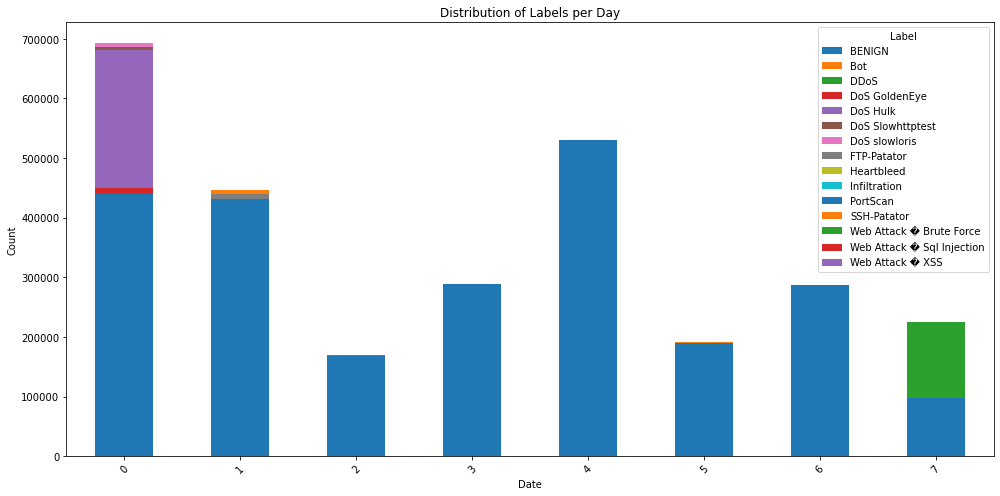

In [28]:
label_distribution = df.groupby(['day', 'label']).size().unstack(fill_value=0)

# Plot the distribution
label_distribution.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribution of Labels per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [126]:
def plot_dist(df,col):
    distribution = df.groupby(['label'])[col].mean()
    # Plot the distribution
    distribution.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()	

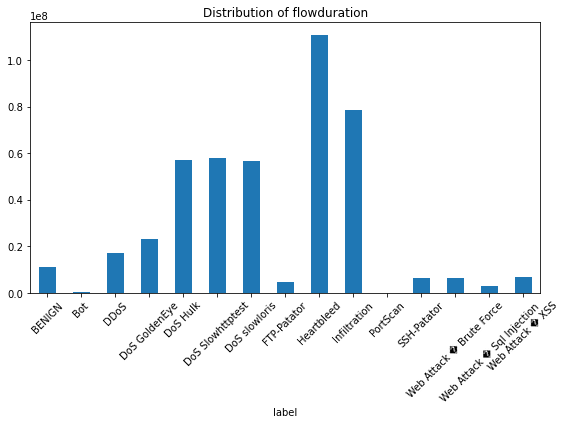

In [128]:
plot_dist(df,'flowduration')

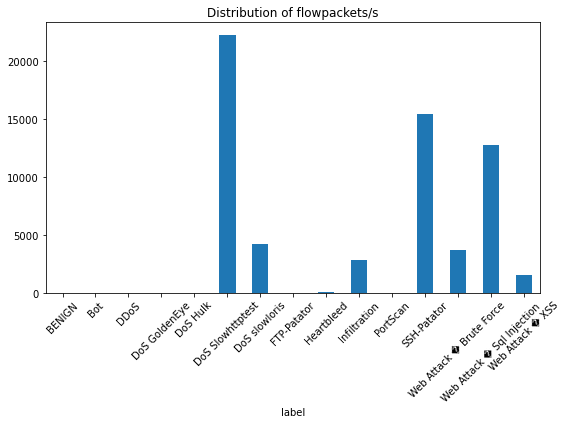

In [130]:
plot_dist(df,'flowpackets/s')

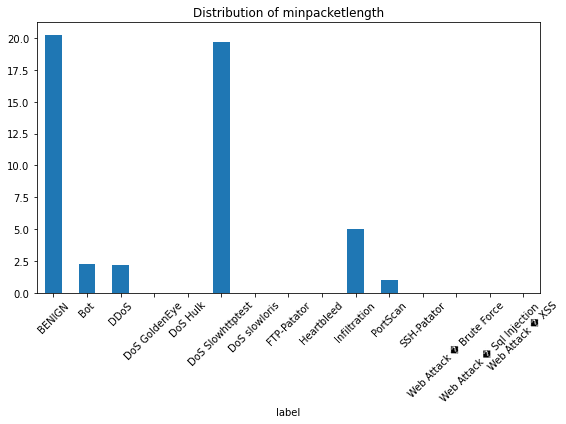

In [132]:
plot_dist(df,'minpacketlength')

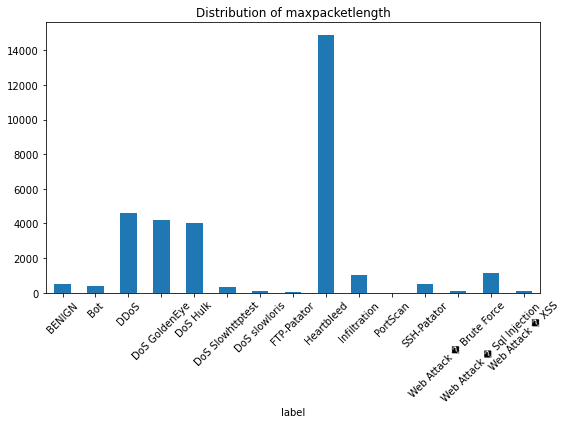

In [134]:
plot_dist(df, 'maxpacketlength')

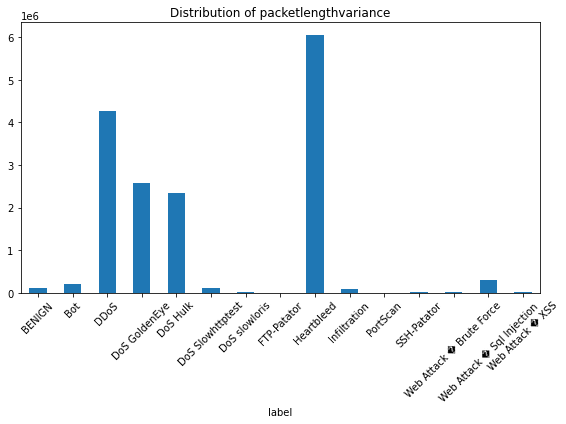

In [136]:
plot_dist(df,'packetlengthvariance')